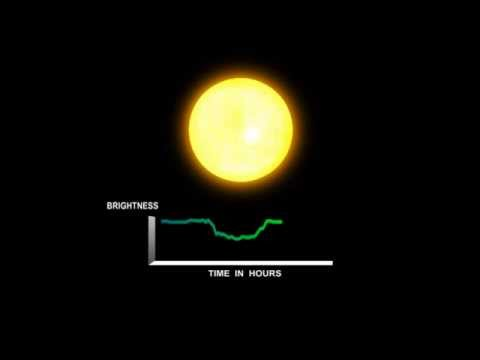

In [1]:
from exoexplorations import *
show_transit_video()

In [10]:
# adjust the planet and the star's radius
# make star less than 0.5 the smallest imsize 
planet_radius, star_radius = 80, 100
inclination = 30

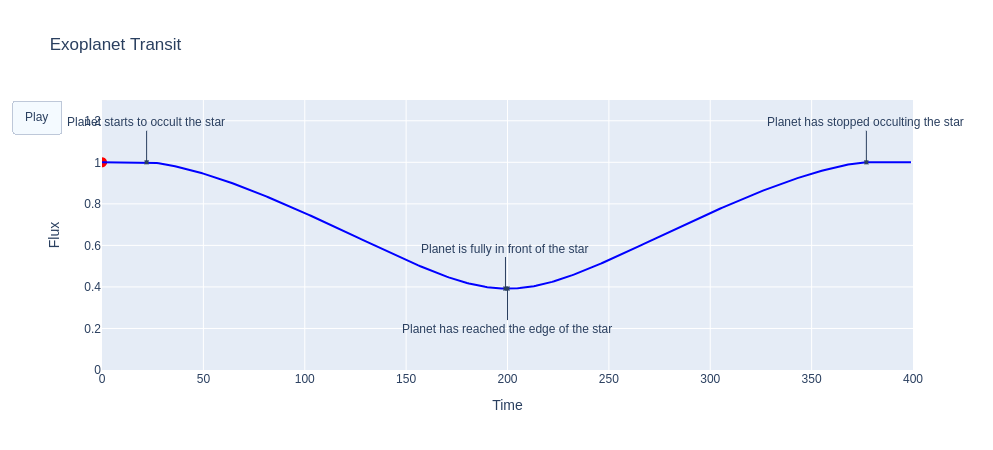

In [11]:
simulate(planet_radius, star_radius, inclination)